# **Question 1**

# **OR Problem**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

missClassificationCount = []

def activation_function(z):
  if (z >= 0): return 1
  return 0

def sumWeightedInput(weights, inputs):
  temp =   [weights[i] * inputs[i - 1] for i in range(1, len(weights))]
  return (sum(temp) + weights[0])

def perceptron(inputs, weights):
  return activation_function(sumWeightedInput(weights, inputs))

def updateWeights(weights, trainingBatch, learning_rate):
  for row in trainingBatch:
    output = perceptron(row[:2], weights)
    loss = learning_rate * (row[-1] - output)
    weights[0] += loss
    weights[1] += loss * row[0]
    weights[2] += loss * row[1]

def testing(weights, dataSet):
  count = 0
  for row in dataSet:
    output = perceptron(row[:2], weights)
    if (output != row[-1]): count += 1
  return count

def train(weights, data, learning_rate, missClassificationCount):
  miss = []
  index = [i for i in range(4)]
  while (True):
    temp = random.sample(index, 2) # using a batch training method (taking only  a random part of the dataset for training)
    trainingBatch = [data[i] for i in temp]
    updateWeights(weights, trainingBatch, learning_rate)
    miss.append(testing(weights, data))
    if (miss[-1] == 0): break  #break from the loop  when missclassification count is 0
  missClassificationCount.append(miss)


In [ ]:
dataSet = [[0, 0, 0],
           [0, 1, 1],
           [1, 0, 1],
           [1, 1, 1]]

learningRateList = []

for i in range(5):
  # initializing the weights
  weights = [0.2, 0.1, -0.25]
  learning_rate = random.random()
  learningRateList.append(learning_rate)
  #start training
  train(weights, dataSet, learning_rate, missClassificationCount)
  #end training



learning Rate: 0.649171


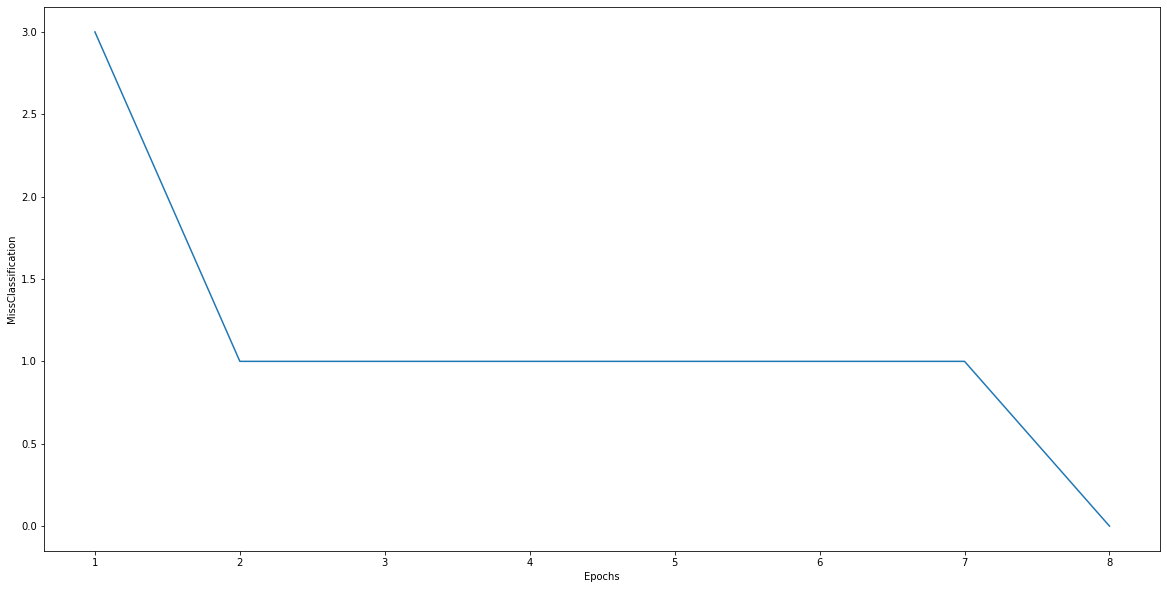



learning Rate: 0.984117


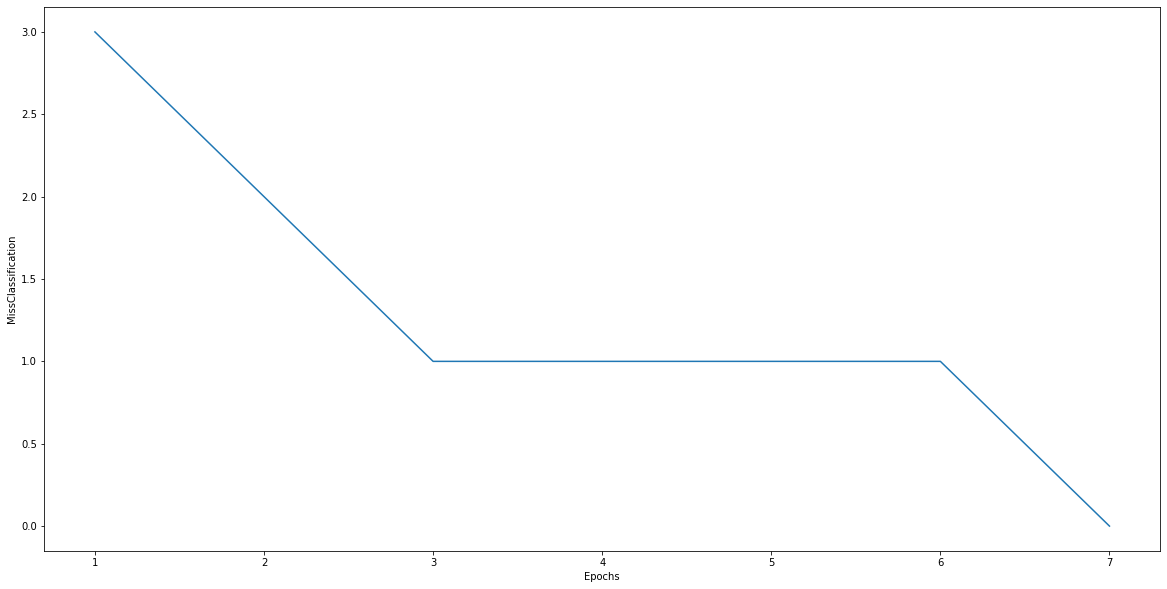



learning Rate: 0.269834


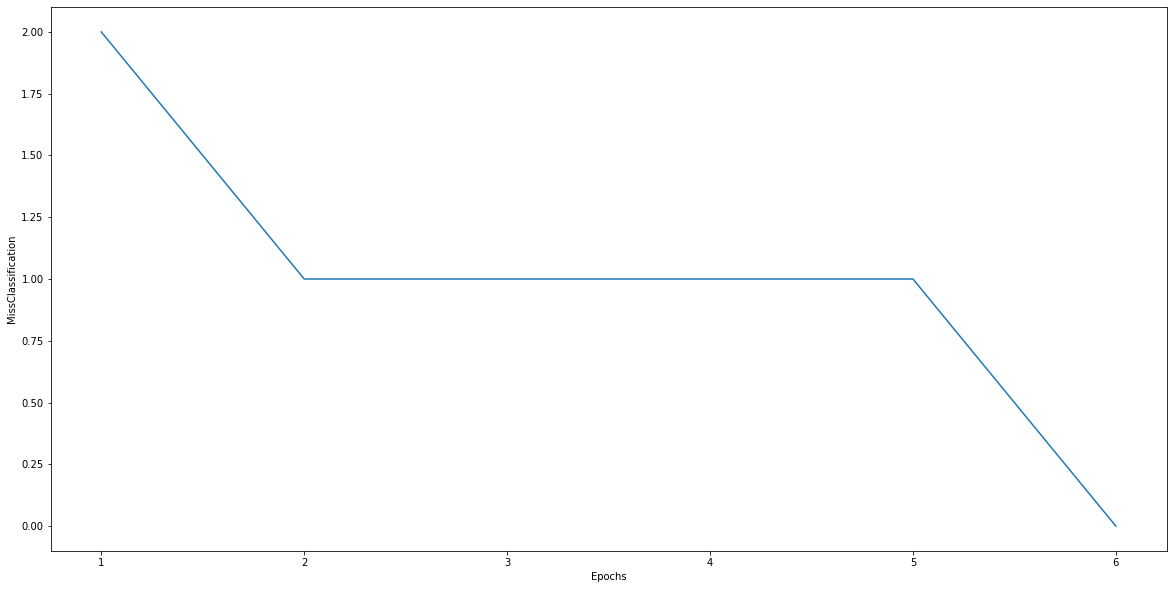



learning Rate: 0.429855


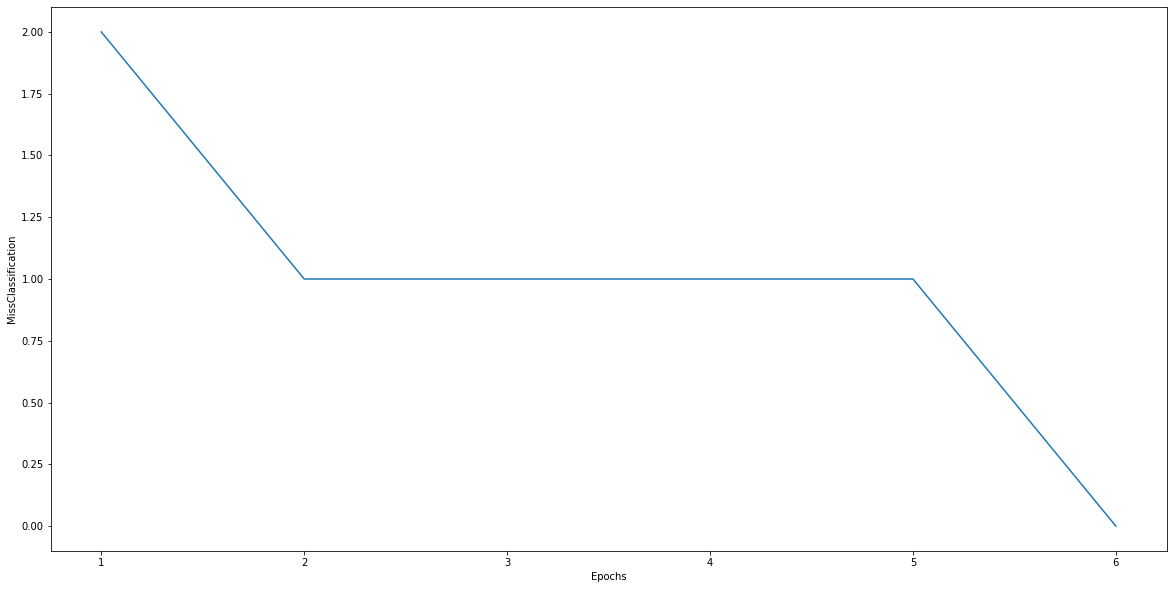



learning Rate: 0.804316


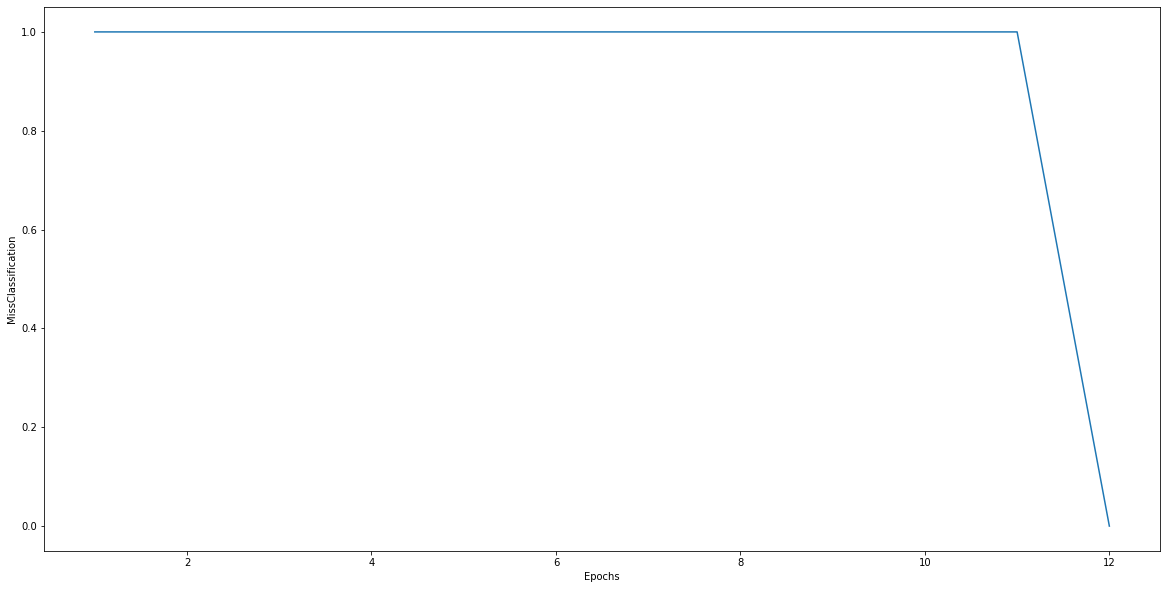

In [ ]:

for j in range(len(missClassificationCount)):
  print("\n\nlearning Rate: %f" %(learningRateList[j]))
  epoch = [(i + 1) for i in range(len(missClassificationCount[j]))]
  fig = plt.figure(figsize=(20, 10))
  plt.plot(epoch, missClassificationCount[j])
  plt.xlabel('Epochs')
  plt.ylabel('MissClassification')
  plt.show()

# **AND PROBLEM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

missClassificationCount = []

def activation_function(z):
  if (z >= 0): return 1
  return 0

def sumWeightedInput(weights, inputs):
  temp =   [weights[i] * inputs[i - 1] for i in range(1, len(weights))]
  return (sum(temp) + weights[0])

def perceptron(inputs, weights):
  return activation_function(sumWeightedInput(weights, inputs))

def updateWeights(weights, trainingBatch, learning_rate):
  for row in trainingBatch:
    output = perceptron(row[:2], weights)
    loss = learning_rate * (row[-1] - output)
    weights[0] += loss
    weights[1] += loss * row[0]
    weights[2] += loss * row[1]

def testing(weights, dataSet):
  count = 0
  for row in dataSet:
    output = perceptron(row[:2], weights)
    if (output != row[-1]): count += 1
  return count

def train(weights, data, learning_rate, missClassificationCount):
  miss = []
  index = [i for i in range(4)]
  while (True):
    temp = random.sample(index, 2) # using a batch training method (taking only  a random part of the dataset for training)
    trainingBatch = [data[i] for i in temp]
    updateWeights(weights, trainingBatch, learning_rate)
    miss.append(testing(weights, data))
    if (miss[-1] == 0): break  #break from the loop  when missclassification count is 0
  missClassificationCount.append(miss)


In [ ]:
dataSet = [[0, 0, 0],
           [0, 1, 0],
           [1, 0, 0],
           [1, 1, 1]]

learningRateList = []

for i in range(5):
  # initializing the weights
  weights = [0.2, 0.1, -0.25]
  learning_rate = random.random()
  learningRateList.append(learning_rate)
  #start training
  train(weights, dataSet, learning_rate, missClassificationCount)
  #end training



learning Rate: 0.301698


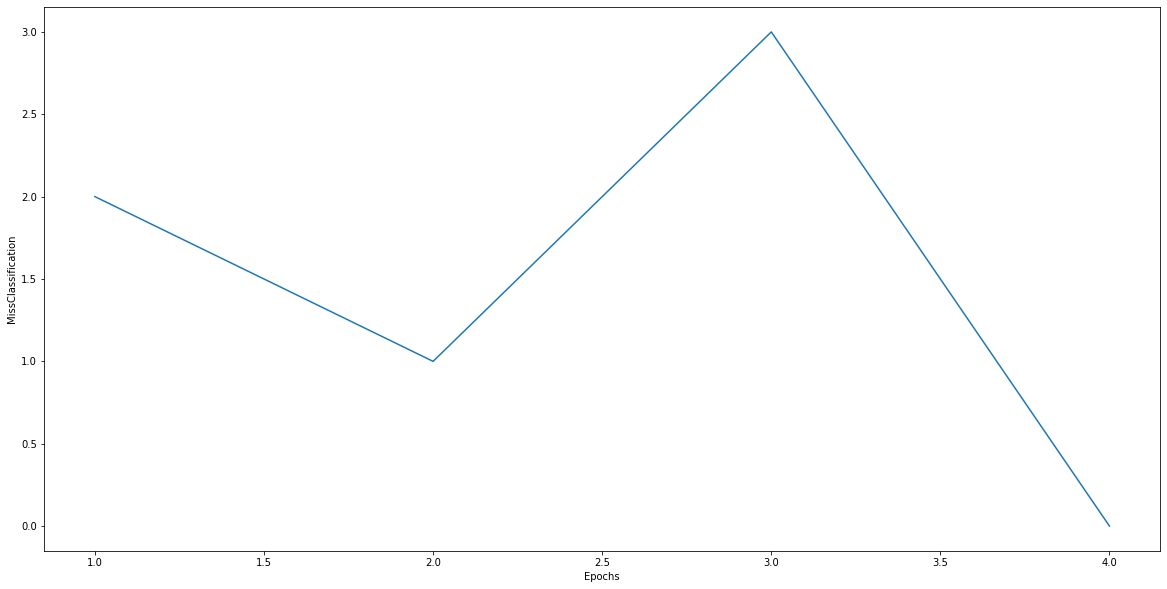



learning Rate: 0.436006


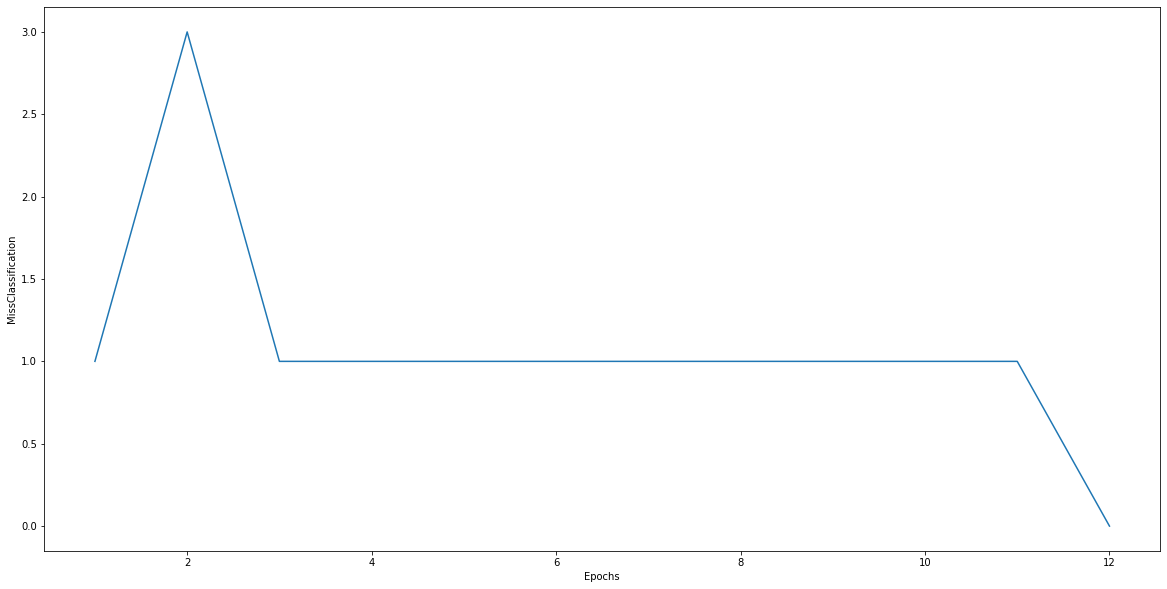



learning Rate: 0.742666


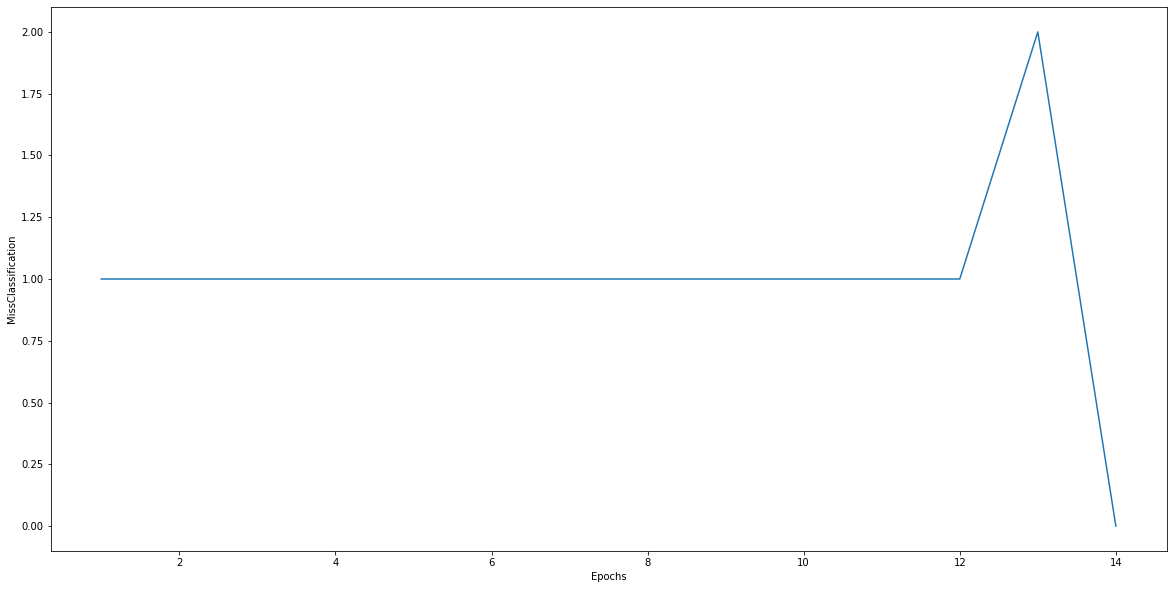



learning Rate: 0.039156


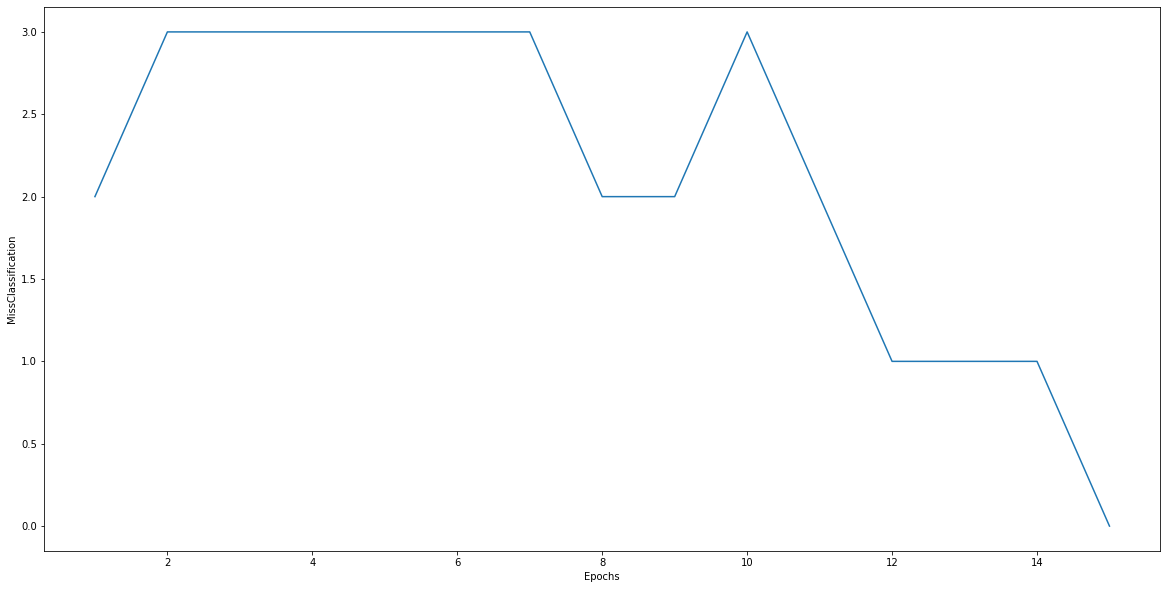



learning Rate: 0.259828


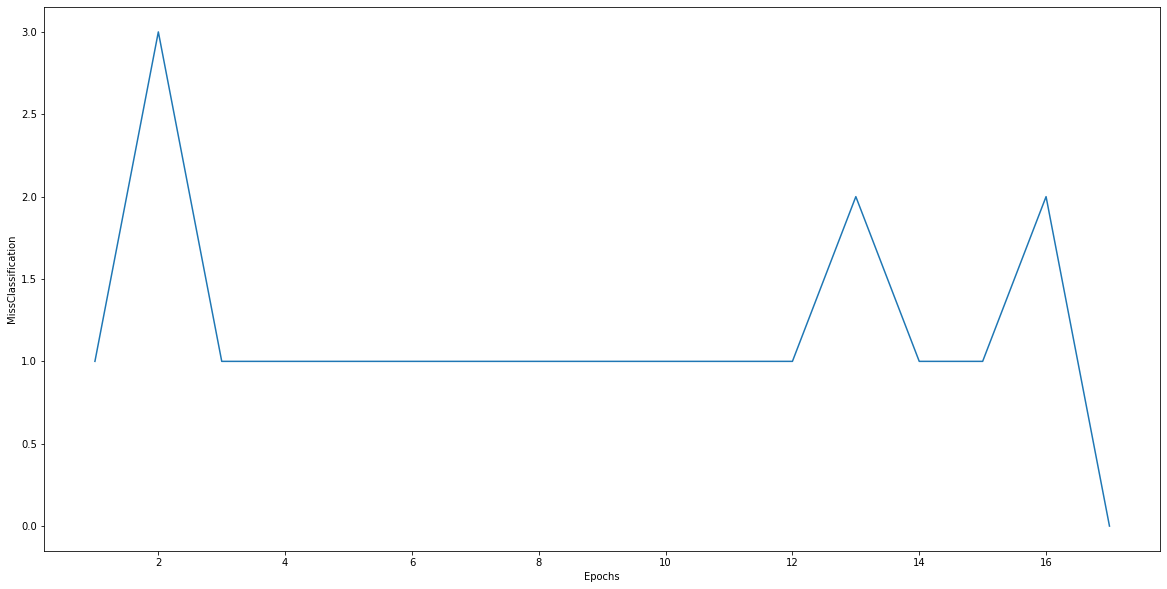

In [ ]:

for j in range(len(missClassificationCount)):
  print("\n\nlearning Rate: %f" %(learningRateList[j]))
  epoch = [(i + 1) for i in range(len(missClassificationCount[j]))]
  fig = plt.figure(figsize=(20, 10))
  plt.plot(epoch, missClassificationCount[j])
  plt.xlabel('Epochs')
  plt.ylabel('MissClassification')
  plt.show()

# **QUESTION 2**

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# creating a dataframe of the dataset
data = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data = data['data'], columns=data['feature_names'])
df['diagnosis'] = data['target']

# printing the first 10 rows of the dataframe
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
# now since we are trying to train a naive bayesian model, we will have to remove some redundant features since
# fundamental assumption of naive bayesian model is that each feature is independent of each other. 
# printing the covariance matrix of the features in the dataset

df[df.columns[:30]].corr('pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Now we will remove one of the features from feature pairs which have absolute correlation cofficient >= 0.9

Based the above covariance matrix, the features which are being removed are:

mean perimeter, mean radius

perimeter error, area error

worst perimeter, worst area

In [ ]:
df_dropped_features = df.drop(['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst perimeter', 'worst area'], axis = 1)

# printing the new dataframe after deleting the dependent feature columns
df_dropped_features.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
import random
import statistics
import math

dataSet = df_dropped_features.values.tolist()

index = [i for i in range(len(dataSet))]

temp = random.sample(index, int(len(dataSet) * 0.7))

trainingSet = [dataSet[i] for i in temp]
testSet = [dataSet[i] for i in list(set(index) - set(temp))]

print('Training Dataset:')
print(trainingSet)

print('\n\nTest Dataset:')
print(testSet)

Training Dataset:
[[16.11, 18.05, 0.09721, 0.1137, 0.09447, 0.05943, 0.1861, 0.06248, 0.7049, 1.332, 0.00677, 0.01938, 0.03067, 0.01167, 0.01875, 0.003434, 19.92, 25.27, 0.1314, 0.2236, 0.2802, 0.1216, 0.2792, 0.08158, 0.0], [19.1, 26.29, 0.1215, 0.1791, 0.1937, 0.1469, 0.1634, 0.07224, 0.519, 2.91, 0.007545, 0.0605, 0.02134, 0.01843, 0.03056, 0.01039, 20.33, 32.72, 0.1392, 0.2817, 0.2432, 0.1841, 0.2311, 0.09203, 0.0], [14.48, 21.46, 0.09444, 0.09947, 0.1204, 0.04938, 0.2075, 0.05636, 0.4204, 2.22, 0.009369, 0.02983, 0.05371, 0.01761, 0.02418, 0.003249, 16.21, 29.25, 0.1306, 0.1976, 0.3349, 0.1225, 0.302, 0.06846, 0.0], [12.88, 18.22, 0.1218, 0.1661, 0.04825, 0.05303, 0.1709, 0.07253, 0.4426, 1.169, 0.005273, 0.02329, 0.01405, 0.01244, 0.01816, 0.003299, 15.05, 24.37, 0.1456, 0.2961, 0.1246, 0.1096, 0.2582, 0.08893, 1.0], [14.03, 21.25, 0.0907, 0.06945, 0.01462, 0.01896, 0.1517, 0.05835, 0.2589, 1.503, 0.007389, 0.01383, 0.007302, 0.01004, 0.01263, 0.002925, 15.33, 30.28, 0.1287, 0.15

In [ ]:
# calculating the prior probability of the class levels
prior_prob = []

count = 0
for row in trainingSet:
  if (row[-1] == 0): count += 1
prior_prob.append(count / len(trainingSet))
prior_prob.append(1.0 - prior_prob[0])

# we are assuming a gaussian distribution of of each feature for each class
# while marginal probability or 

# dividing the trainingSet dataset by class
trainingSet_class0, trainingSet_class1 = [], []
for row in trainingSet:
  if (row[-1] == 0): trainingSet_class0.append(row)
  else: trainingSet_class1.append(row)


# finding mean and standard deviation for each of the labels for each class
mean_class0, mean_class1, stdv_class0, stdv_class1 = [], [], [], []

for i in range(len(trainingSet_class0[0]) - 1):
  temp = [row[i] for row in trainingSet_class0]
  mean_class0.append(statistics.mean(temp))
  stdv_class0.append(statistics.stdev(temp))

for i in range(len(trainingSet_class1[0]) - 1):
  temp = [row[i] for row in trainingSet_class1]
  mean_class1.append(statistics.mean(temp))
  stdv_class1.append(statistics.stdev(temp))


# function to get the conditional class probability based on assumption of a gaussian distribution for each feature for each class
def getConditionalClassProbability(class_level, featureSet):
  probability = 1
  if (class_level):
    for i in range(len(featureSet)):
      temp = math.exp(-0.5 * ((featureSet[i] - mean_class1[i]) / stdv_class1[i]) ** 2) / (stdv_class1[i] * math.sqrt(2 * math.pi))
      probability *= temp
  else:
    for i in range(len(featureSet)):
      temp = math.exp(-0.5 * ((featureSet[i] - mean_class0[i]) / stdv_class0[i]) ** 2) / (stdv_class0[i] * math.sqrt(2 * math.pi))
      probability *= temp
    
  return probability

# function to call return class level
def bayesianClassifierModel(featureSet):
  numerator_val = []
  for i in range(2):
    numerator_val.append(getConditionalClassProbability(i, featureSet) * prior_prob[i])
  
  if (numerator_val[0] >= numerator_val[1]): return 0
  return 1

# function to calculate the accuracy of the naive bayesian classifier (based on assumption of gausian distribution for each class)
def accuracy_calc(testSet):
  count = 0
  for i in range(len(testSet)):
    featureSet = testSet[i][:-1]
    class_lvl = bayesianClassifierModel(featureSet)
    if (class_lvl == testSet[i][-1]): count += 1
  
  return (count / len(testSet) * 100)

In [ ]:
print("Training Set accuracy:")
print(accuracy_calc(trainingSet))

print("\n\nTest Set accuracy:")
print(accuracy_calc(testSet))

Training Set accuracy:
91.20603015075378


Test Set accuracy:
92.98245614035088
